In [1]:
# conda activate dl1dh_s1
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import time

from dl1_data_handler.reader import DL1DataReaderSTAGE1, DL1DataReaderDL1DH

In [69]:
# example derived from /home/woody/caph/mpp228/ML/CTA/dl1-data-handler_stage1/notebooks/dl1reading_stage1.ipynb

In [108]:
event_type = 'proton' # 'proton', 'gamma-diffuse'
evt = event_type.split('-')[0]

#n_events = 1000 #10**4
n_events = 5*10**4 #10**4
print(n_events)

folder = '/home/saturn/caph/mpp228/CTA_data/Prod5_GRID/'
folder_in = folder + 'Prod5_Paranal_AdvancedBaseline_NSB1x_%s_North_20deg_ctapipe_v0.10.5_DL1/' % event_type
folder_out = folder + 'Prod5_square_images/'
if not os.path.isdir(folder_out):
    os.mkdir(folder_out)
fn_out = folder_out + '%s_%i_images.h5' % (event_type, n_events)
print(fn_out)

update = True # if Ture, the file will be updated, otherwise it will be created or replaced
channels_list_all = ['image', 'image_mask']
pars_list_all = ['hillas_intensity', 'hillas_x', 'hillas_y', 'hillas_width', 'hillas_length',
            'hillas_psi', 'hillas_skewness', 'hillas_kurtosis', 'hillas_r', 'hillas_phi',
            'morphology_num_pixels', 'morphology_num_medium_islands', 'morphology_num_large_islands']
mc_info_list_all = ["true_energy", "true_alt", "true_az"]

if update and os.path.isfile(fn_out):
    # the file will be updated
    # fields to update
    channels_list = ['image'] # there should be at least one entry here for the reader
    pars_list = ['morphology_num_pixels', 'morphology_num_medium_islands', 'morphology_num_large_islands']
    mc_info_list = []
    # add fields which are not in the file
    with h5py.File(fn_out, 'a') as h5_out:
        for key in channels_list_all:
            if key not in h5_out.keys() and key not in channels_list:
                channels_list.append(key)
        for key in pars_list_all:
            if key not in h5_out.keys() and key not in pars_list:
                pars_list.append(key)
        for key in mc_info_list_all:
            if key not in h5_out.keys() and key not in mc_info_list:
                mc_info_list.append(key)
else:
    # the file will created or replaced
    channels_list = channels_list_all
    pars_list = pars_list_all
    mc_info_list = mc_info_list_all

print(os.path.isfile(fn_out))
print(channels_list, pars_list, mc_info_list)

def fn2reader(fn):
    return DL1DataReaderSTAGE1([fn],
                             mode='mono',
                             #example_identifiers_file="./examples.h5",
                             selected_telescope_types=["LST_LST_LSTCam"],
                             selected_telescope_ids={"LST_LST_LSTCam": [1]},
                             #image_channels = ['image', 'peak_time', 'image_mask'],
                             image_channels=channels_list,
                             parameter_list=pars_list,
                             event_info=mc_info_list)

50000
/home/saturn/caph/mpp228/CTA_data/Prod5_GRID/Prod5_square_images/proton_50000_images.h5
True
['image'] ['morphology_num_pixels', 'morphology_num_medium_islands', 'morphology_num_large_islands'] []


In [109]:
out_dict = {}
for key in mc_info_list:
    out_dict[key] = np.zeros(n_events)
for key in pars_list:
    out_dict[key] = np.zeros(n_events)

In [110]:
%%time
fns = os.listdir(folder_in)
fns = [fn for fn in fns if fn.endswith('h5')]
t0 = time.time()
t_read = 0.

i = 0
nout = 0
while nout < n_events:
    fn = folder_in + fns[i]
    t_read0 = time.time()
    reader = fn2reader(fn)
    t_read += time.time() - t_read0
    if i == 0:
        im_dims = reader[0][0].shape[:2]
        for key in channels_list:
            out_dict[key] = np.zeros((n_events, im_dims[0], im_dims[1]))
    for k in range(len(reader)):
        if nout + k == n_events:
            break
        #out_dict['images'][nout + k] = reader[k][0][:,:,0]
        if channels_list:
            images = reader[k][0][:]
        if pars_list:
            pars = reader[k][1][:]
        if mc_info_list:
            mc_pars = reader[k][2:2+len(mc_info_list)]
        for m, key in enumerate(channels_list):
            out_dict[key][nout + k] = images[:,:,m]
        for m, key in enumerate(pars_list):
            out_dict[key][nout + k] = pars[m]
        for m, key in enumerate(mc_info_list):
            out_dict[key][nout + k] = mc_pars[m]
    i += 1
    nout += len(reader)
    print('%i files, %i events, %.2f s to read, %.2f s past' % (i, nout, t_read, time.time() - t0))

1 files, 193 events, 1.70 s to read, 1.99 s past
2 files, 381 events, 3.38 s to read, 3.94 s past
3 files, 561 events, 5.09 s to read, 5.93 s past
4 files, 761 events, 6.92 s to read, 8.07 s past
5 files, 955 events, 8.60 s to read, 10.07 s past
6 files, 1153 events, 10.29 s to read, 12.18 s past
7 files, 1342 events, 11.99 s to read, 14.18 s past
8 files, 1518 events, 13.92 s to read, 16.37 s past
9 files, 1729 events, 15.43 s to read, 18.22 s past
10 files, 1947 events, 17.04 s to read, 20.17 s past
11 files, 2120 events, 18.74 s to read, 22.13 s past
12 files, 2323 events, 20.25 s to read, 23.95 s past
13 files, 2526 events, 21.84 s to read, 25.85 s past
14 files, 2735 events, 23.40 s to read, 27.72 s past
15 files, 2928 events, 25.23 s to read, 29.90 s past
16 files, 3137 events, 26.89 s to read, 31.89 s past
17 files, 3340 events, 31.40 s to read, 36.75 s past
18 files, 3563 events, 33.18 s to read, 38.85 s past
19 files, 3743 events, 34.93 s to read, 40.88 s past
20 files, 3916 e

150 files, 29028 events, 249.09 s to read, 294.87 s past
151 files, 29197 events, 250.55 s to read, 296.57 s past
152 files, 29403 events, 252.01 s to read, 298.33 s past
153 files, 29616 events, 253.47 s to read, 300.11 s past
154 files, 29832 events, 254.94 s to read, 301.89 s past
155 files, 30029 events, 256.39 s to read, 303.63 s past
156 files, 30229 events, 257.86 s to read, 305.40 s past
157 files, 30430 events, 259.35 s to read, 307.19 s past
158 files, 30629 events, 260.81 s to read, 308.93 s past
159 files, 30831 events, 262.27 s to read, 310.69 s past
160 files, 31026 events, 263.74 s to read, 312.44 s past
161 files, 31218 events, 265.21 s to read, 314.19 s past
162 files, 31455 events, 266.66 s to read, 315.99 s past
163 files, 31666 events, 268.12 s to read, 317.76 s past
164 files, 31858 events, 269.59 s to read, 319.51 s past
165 files, 32060 events, 271.06 s to read, 321.29 s past
166 files, 32273 events, 272.52 s to read, 323.06 s past
167 files, 32450 events, 273.98

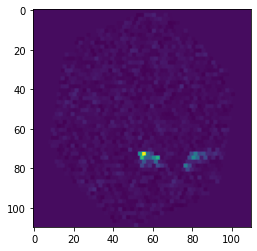

In [111]:
if 'image' in out_dict:
    plt.imshow(out_dict['image'][0])

In [112]:
%%time
if update and os.path.isfile(fn_out):
    h5_out = h5py.File(fn_out, 'a')
else:
    if os.path.isfile(fn_out):
        os.remove(fn_out)
    h5_out = h5py.File(fn_out, 'w')

for key in out_dict.keys():
    if key in h5_out.keys():
        del h5_out[key]
    h5_out[key] = out_dict[key]

CPU times: user 43.4 ms, sys: 3.8 s, total: 3.85 s
Wall time: 3.79 s


In [113]:
os.path.isfile(fn_out)

True

In [114]:
h5_out.close()

In [123]:
h5_test = h5py.File(fn_out, 'r')

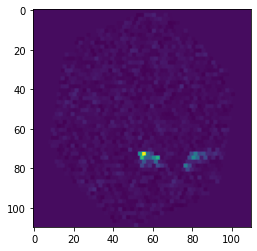

In [124]:
plt.imshow(h5_test['image'][0])

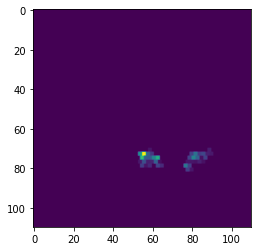

In [125]:
plt.imshow(h5_test['image_mask'][0])

In [126]:
h5_test['true_energy'][:10]

array([ 0.98592114,  0.98592114,  0.96325725,  0.11349198,  0.23770268,
        0.81697851, 13.74468613,  0.1327962 ,  1.69124889,  0.15824963])

In [127]:
for i in range(30):
    EE = h5_test['true_energy'][i]
    hi = h5_test['hillas_intensity'][i]
    hl = h5_test['hillas_x'][i]
    if np.isnan(hi) and np.isnan(hl):
        print('%i, Energy %.3f, hillas intensity nan, hillas x nan' % (i, EE))
    else:
        print('%i, Energy %.3f, hillas intensity %i, hillas x %.3f' % (i, EE, hi, hl))
    


0, Energy 0.986, hillas intensity 660, hillas x 0.373
1, Energy 0.986, hillas intensity 143, hillas x -0.508
2, Energy 0.963, hillas intensity 124, hillas x 0.535
3, Energy 0.113, hillas intensity 81, hillas x -0.739
4, Energy 0.238, hillas intensity 105, hillas x 0.233
5, Energy 0.817, hillas intensity 236, hillas x -0.312
6, Energy 13.745, hillas intensity nan, hillas x nan
7, Energy 0.133, hillas intensity 55, hillas x -0.343
8, Energy 1.691, hillas intensity 375, hillas x 1.020
9, Energy 0.158, hillas intensity 147, hillas x 0.156
10, Energy 0.268, hillas intensity 86, hillas x -0.339
11, Energy 3.083, hillas intensity 636, hillas x 0.821
12, Energy 3.053, hillas intensity 381, hillas x -0.492
13, Energy 0.080, hillas intensity 154, hillas x 0.012
14, Energy 0.547, hillas intensity 1100, hillas x 0.008
15, Energy 0.232, hillas intensity 81, hillas x -0.828
16, Energy 0.163, hillas intensity 140, hillas x 0.223
17, Energy 0.176, hillas intensity 124, hillas x 0.774
18, Energy 0.294,

In [120]:
h5_test.keys()

<KeysViewHDF5 ['hillas_intensity', 'hillas_kurtosis', 'hillas_length', 'hillas_phi', 'hillas_psi', 'hillas_r', 'hillas_skewness', 'hillas_width', 'hillas_x', 'hillas_y', 'image', 'image_mask', 'morphology_num_large_islands', 'morphology_num_medium_islands', 'morphology_num_pixels', 'true_alt', 'true_az', 'true_energy']>

hillas_intensity 147.90843200683594
hillas_kurtosis 2.339791774749756
hillas_length 0.0387289822101593
hillas_phi 76.42643737792969
hillas_psi -83.44672393798828
hillas_r 0.6645195484161377
hillas_skewness -0.28045395016670227
hillas_width 0.02058294601738453
hillas_x 0.15595845878124237
hillas_y 0.6459591388702393
morphology_num_large_islands 0.0
morphology_num_medium_islands 1.0
morphology_num_pixels 7.0
true_alt 70.33662554444182
true_az 7.211732074786125
true_energy 0.158249631524086


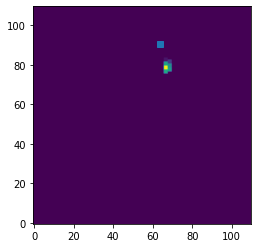

In [151]:
i = 9
for key in h5_test.keys():
    if not key.startswith('image'):
        print(key, h5_test[key][i])
plt.imshow(h5_test['image_mask'][i].T, origin='lower')
xi = 110 * (1 + h5_test['hillas_x'][i]) / 2
yi = 110 * (1 + h5_test['hillas_y'][i]) / 2
plt.plot(xi, yi, marker='s')

In [132]:
plt.imshow?

In [129]:
np.sum(h5_test['image_mask'][0])

658.7000000476837

In [121]:
h5_test.close()